In [11]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [14]:
%reload_ext kedro.ipython

[11/08/24 03:15:41] INFO     Registered line magic '%reload_kedro'                                   ]8;id=919181;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=822933;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py#61\61]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=619125;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=358233;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Resolved project path as: /home/azureuser/code/unet.                   ]8;id=514849;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=32919;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py#178\178]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=128482;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=775558;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project unet                                                     ]8;id=998985;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=766371;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=358644;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=23287;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py#145\145]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=335281;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=992920;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/ipython/__init__.py#151\151]8;;\

[11/08/24 03:22:43] INFO     Loading data from segmentation_labels (JSONDataset)...             ]8;id=595844;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=196987;file:///home/azureuser/anaconda3/envs/kedro/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

Number of tasks: 166

Processing task 0
Found 2 results

Result type: keypointlabels

Result type: brushlabels
Found brush annotation
Attempting to decode...
Decoded 1 layers
Plotting layer: image-Single Cell-0
Mask shape: (200, 992)


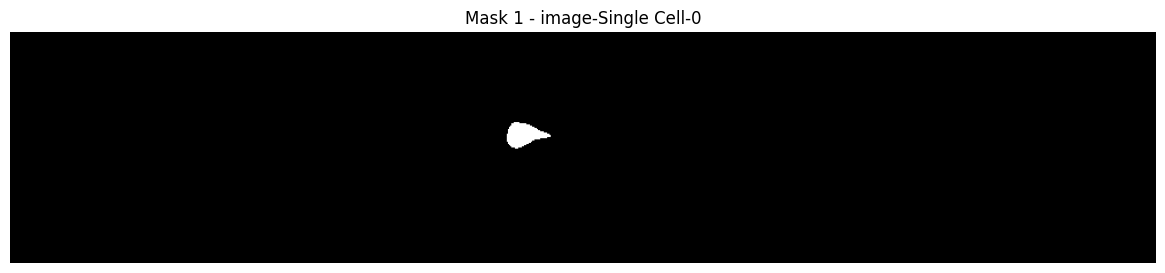


Processing task 1
Found 2 results

Result type: keypointlabels

Result type: brushlabels
Found brush annotation
Attempting to decode...
Decoded 1 layers
Plotting layer: image-Single Cell-0
Mask shape: (200, 992)


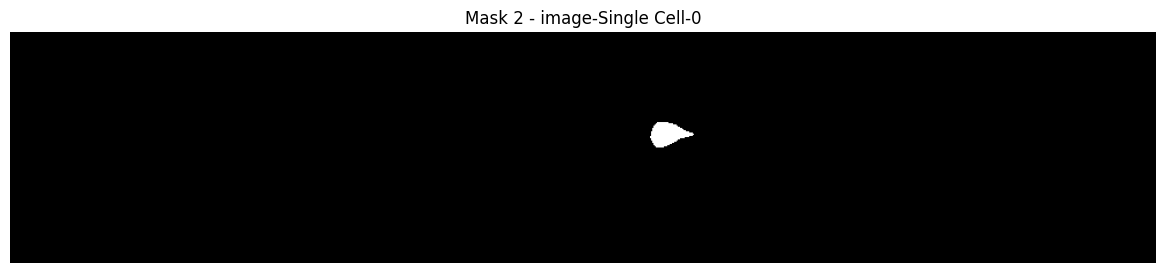


Processing task 2
Found 1 results

Result type: brushlabels
Found brush annotation
Attempting to decode...
Decoded 1 layers
Plotting layer: image-Single Cell-0
Mask shape: (200, 992)


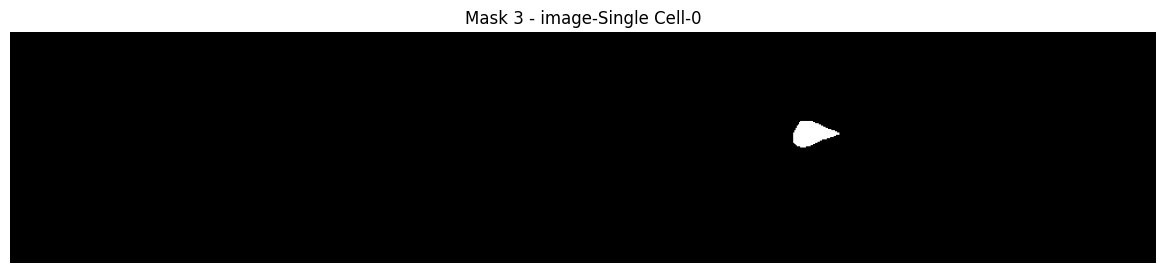

In [17]:
import matplotlib.pyplot as plt
from label_studio_sdk.converter.brush import decode_from_annotation

# Load the JSON data
json_data = catalog.load("segmentation_labels")
print(f"Number of tasks: {len(json_data)}")

# For each task in your dataset
for idx, task in enumerate(json_data[:3]):
    print(f"\nProcessing task {idx}")
    
    if not task['annotations']:
        print(f"No annotations for task {idx}")
        continue
        
    print(f"Found {len(task['annotations'][0]['result'])} results")
    
    for result in task['annotations'][0]['result']:
        print(f"\nResult type: {result['type']}")
        
        if result['type'] == 'brushlabels':  # Only process brush annotations
            print("Found brush annotation")
            # The RLE data is nested in result['value'], not directly in result
            formatted_result = [{
                'type': 'brushlabels',
                'rle': result['value']['rle'],  # Changed this line
                'original_width': result['original_width'],
                'original_height': result['original_height'],
                'brushlabels': result['value']['brushlabels']  # Changed this line
            }]
            
            print("Attempting to decode...")
            layers = decode_from_annotation('image', formatted_result)
            print(f"Decoded {len(layers)} layers")
            
            # Plot each layer
            for name, mask in layers.items():
                print(f"Plotting layer: {name}")
                print(f"Mask shape: {mask.shape}")
                plt.figure(figsize=(15, 3))
                plt.imshow(mask, cmap='gray')
                plt.title(f"Mask {idx + 1} - {name}")
                plt.axis('off')
                plt.show()